# Transformers4Rec:
Expected Runtime:

For ml-100k (100,000 interactions) and with the configurations (10 epochs, batch size of 128):


*   On a GPU (e.g., NVIDIA Tesla T4): It may take about 3–8 minutes.
*   On a CPU (e.g., 8-core): It could range from 10–20 minutes
*   GPU (Google Colab) T4 GPU: ~2–5 minutes
*   GPU (Google Colab) L4 GPU: ~1.5–4 minutes
*   GPU (Google Colab) A100 GPU: ~1–2 minutes






**Model 1: Using Transformers4Rec**

Transformers4Rec by NVIDIA: Integrates with Hugging Face Transformers, enabling the application of transformer architectures to sequential and session-based recommendation tasks.


This data set consists of:

*   100,000 ratings (1-5) from 943 users on 1682 movies.
*   Each user has rated at least 20 movies.
*  Simple demographic info for the users (age, gender, occupation, zip)

In [ ]:
# Step 1: Mount Google Drive (if necessary)
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Import necessary libraries
import pandas as pd
import os
from transformers4rec.torch import TabularDataModule
from transformers4rec.torch.models import transformer as tfr
from transformers4rec.config.trainer import T4RecTrainer
import torch
from transformers4rec.config.schema import Schema, Tags  # Correct schema module for CPU version

# Step 3: Set up the path for the dataset
dataset_path = "/content/drive/My Drive/ml-100k/"  # Update this path to match your drive location

# Step 4: Load the MovieLens 100K dataset into a pandas DataFrame
# Reading u.data file
data_file = os.path.join(dataset_path, "u.data")
columns = ['user_id', 'item_id', 'rating', 'timestamp']

# Load the u.data file as a DataFrame
df = pd.read_csv(data_file, sep='\t', names=columns)

# Optional: Load item metadata from u.item
item_file = os.path.join(dataset_path, "u.item")
item_columns = ['item_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

items_df = pd.read_csv(item_file, sep='|', encoding='latin-1', names=item_columns)

# Step 5: Define the schema based on the dataset structure
schema = Schema([
    Schema.Column('user_id', Tags.USER),
    Schema.Column('item_id', Tags.ITEM),
    Schema.Column('timestamp', Tags.CONTINUOUS),
    Schema.Column('rating', Tags.TARGET),
    Schema.Column('movie_title', Tags.ITEM)  # Optional: if you include movie titles
])

# Step 6: Prepare the DataLoader
# Create a DataLoader for Transformers4Rec
data_loader = TabularDataModule(
    schema=schema,
    dataframe=df,
    batch_size=32,
    max_sequence_length=100
)

# Step 7: Set up the Transformer-based recommendation model
# Configure the transformer block
transformer_config = tfr.TransformerBlock(
    d_model=64,  # Embedding dimension
    n_head=4,    # Number of attention heads
    num_layers=2  # Number of transformer layers
)

# Build the model configuration
model_config = tfr.ModelConfig(
    prediction_task="next-item",  # We're predicting the next item for the user
    schema=schema,
    model_block=transformer_config,
    embedding_dim_default=64
)

# Define the recommendation model using the configuration
recommendation_model = tfr.RecommendationModel(model_config)

# Step 8: Train the model using T4RecTrainer
# Set up the trainer
trainer = T4RecTrainer(
    model=recommendation_model,
    datamodule=data_loader,
    max_epochs=5,  # Number of training epochs
    accelerator='cpu'  # Force CPU if needed
)

# Train the model
trainer.fit()

# Step 9: Make Recommendations
# After the model is trained, let's make predictions based on some user sessions.
# Example user session data
user_session = {
    'user_id': [1],  # Example user
    'item_id': [1, 2, 3],  # Example previous items interacted with by the user
    'timestamp': [978300760, 978301968, 978302174]  # Example timestamps
}

# Convert the session data to a DataFrame
user_session_df = pd.DataFrame(user_session)

# Convert the input session to the correct format
input_data = data_load


In [ ]:
!pip uninstall pandas dask cudf dask-cudf merlin transformers4rec -y

Found existing installation: pandas 1.5.3
Uninstalling pandas-1.5.3:
  Successfully uninstalled pandas-1.5.3
Found existing installation: dask 2024.1.1
Uninstalling dask-2024.1.1:
  Successfully uninstalled dask-2024.1.1
Found existing installation: transformers4rec 23.12.0
Uninstalling transformers4rec-23.12.0:
  Successfully uninstalled transformers4rec-23.12.0


In [ ]:
# Install RAPIDS 23.08 including cudf, dask-cudf, cuml, and other dependencies
!pip install --extra-index-url=https://pypi.nvidia.com cudf-cu11==23.08 dask-cudf-cu11==23.08 cuml-cu11==23.08 \
  cugraph-cu11==23.08 pylibcugraph-cu11==23.08 rapids-dask-dependency==23.08 dask-cuda==23.08

In [ ]:
!pip install transformers4rec[torch-gpu]==23.8

In [ ]:
!pip install pandas==1.5.3

In [ ]:
try:
    from transformers4rec.torch import TabularDataModule
    from transformers4rec.torch.models import transformer as tfr
    import cudf
    import pandas as pd
    print(f"Transformers4Rec and cuDF successfully imported with GPU support!\ncuDF version: {cudf.__version__}\npandas version: {pd.__version__}")
except ImportError as e:
    print(f"Error: {e}")


Number of nodes: 34
Number of edges: 78


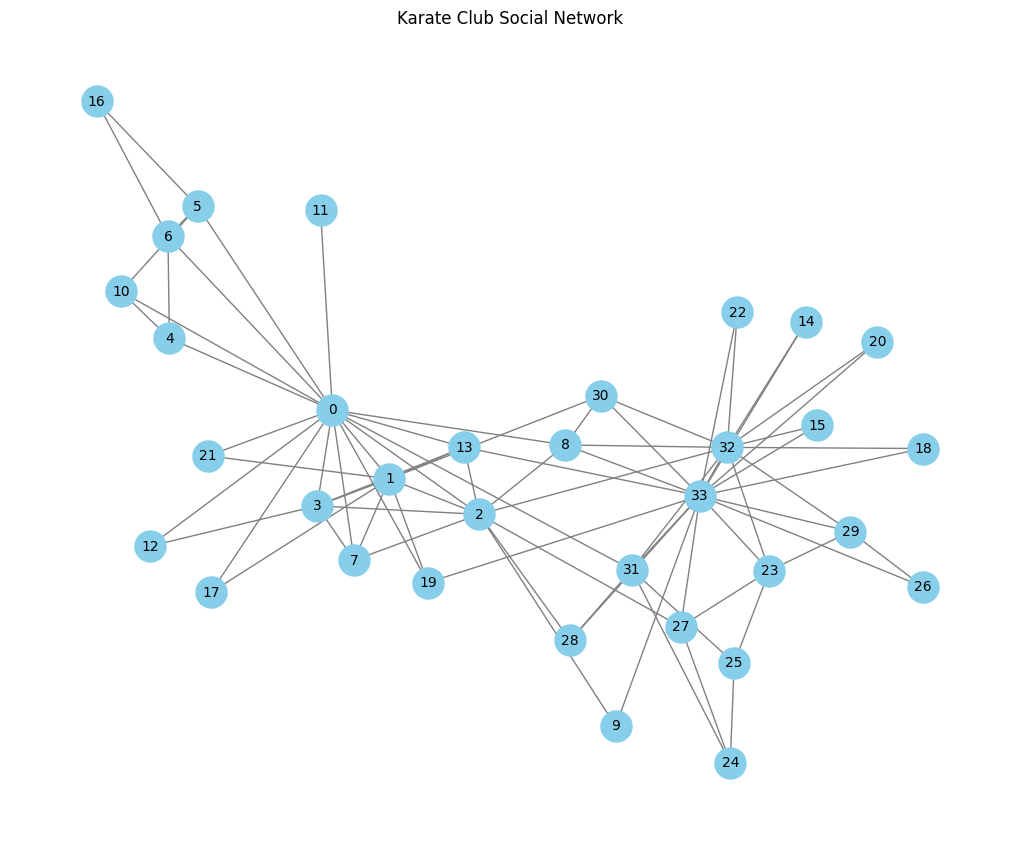

Degree Centrality: {0: 0.48484848484848486, 1: 0.2727272727272727, 2: 0.30303030303030304, 3: 0.18181818181818182, 4: 0.09090909090909091, 5: 0.12121212121212122, 6: 0.12121212121212122, 7: 0.12121212121212122, 8: 0.15151515151515152, 9: 0.06060606060606061, 10: 0.09090909090909091, 11: 0.030303030303030304, 12: 0.06060606060606061, 13: 0.15151515151515152, 14: 0.06060606060606061, 15: 0.06060606060606061, 16: 0.06060606060606061, 17: 0.06060606060606061, 18: 0.06060606060606061, 19: 0.09090909090909091, 20: 0.06060606060606061, 21: 0.06060606060606061, 22: 0.06060606060606061, 23: 0.15151515151515152, 24: 0.09090909090909091, 25: 0.09090909090909091, 26: 0.06060606060606061, 27: 0.12121212121212122, 28: 0.09090909090909091, 29: 0.12121212121212122, 30: 0.12121212121212122, 31: 0.18181818181818182, 32: 0.36363636363636365, 33: 0.5151515151515151}
Closeness Centrality: {0: 0.5689655172413793, 1: 0.4852941176470588, 2: 0.559322033898305, 3: 0.4647887323943662, 4: 0.3793103448275862, 5: 0

In [ ]:
# Import necessary libraries
import networkx as nx
import matplotlib.pyplot as plt

# Load a graph dataset
# For simplicity, let's load a social network dataset - Karate Club (built-in in NetworkX)
G = nx.karate_club_graph()

# Basic Exploration
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

# Draw the graph
plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_color="skyblue", edge_color="gray", node_size=500, font_size=10)
plt.title("Karate Club Social Network")
plt.show()

# Calculating some metrics
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

print("Degree Centrality:", degree_centrality)
print("Closeness Centrality:", closeness_centrality)
print("Betweenness Centrality:", betweenness_centrality)

Processing...
Done!


Number of nodes: 2708
Number of edges: 5278


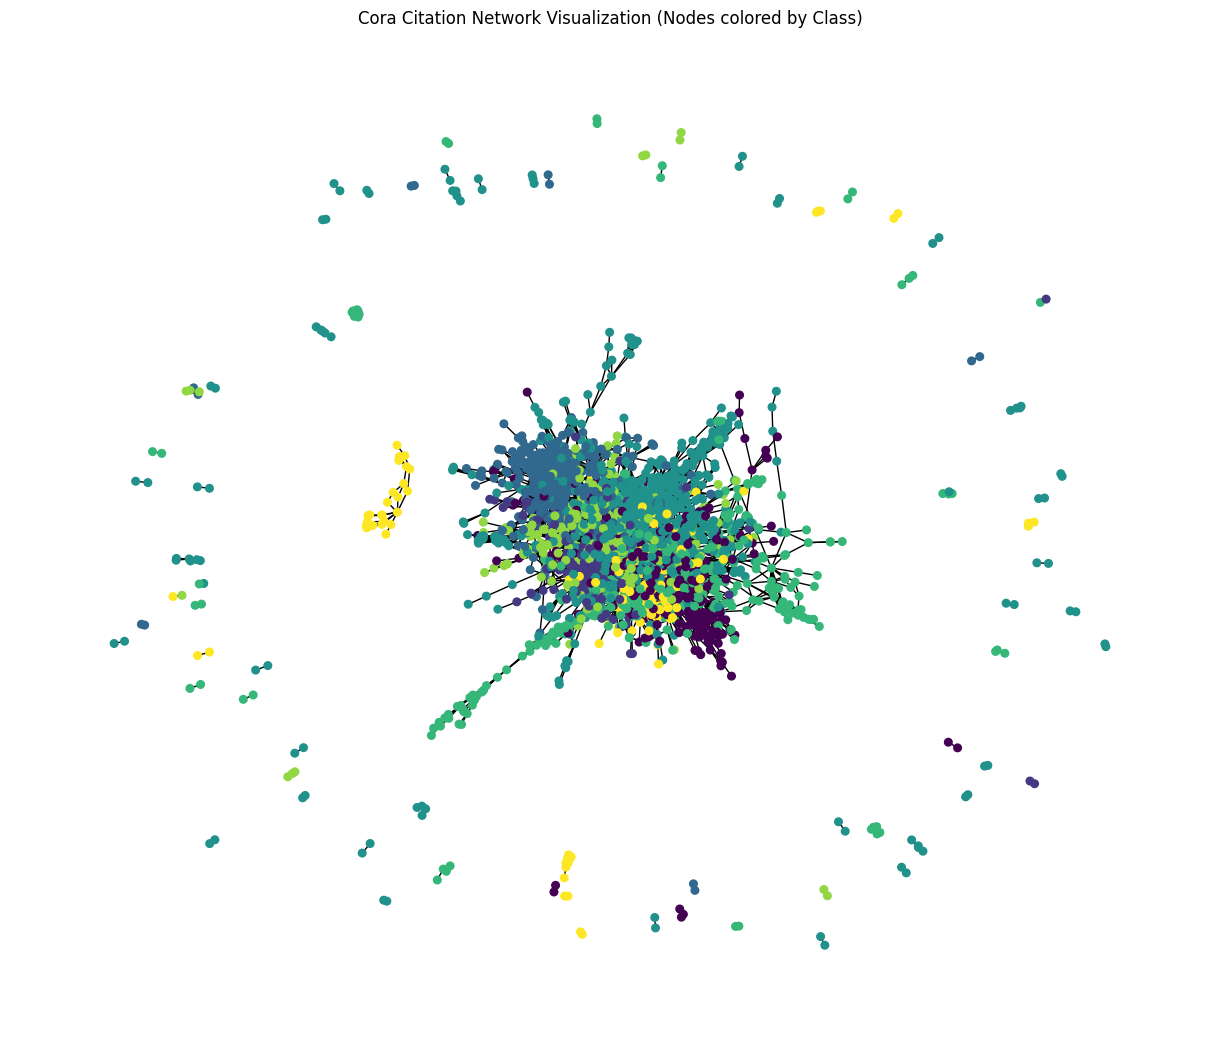

Top 5 Nodes by Degree Centrality:
[(1358, 0.062061322497229406), (306, 0.028814185445142224), (1701, 0.027336534909493903), (1986, 0.024011821204285185), (1810, 0.01625415589213151)]
Number of communities detected: 106
Top 3 largest communities (by number of nodes):
Community 1: 404 nodes
Community 2: 391 nodes
Community 3: 212 nodes
Top 5 Nodes by PageRank:
[(1358, 0.012206568911713374), (1701, 0.006250475261583526), (1986, 0.005352291709647111), (306, 0.005057525005822025), (1810, 0.0036313101875477772)]


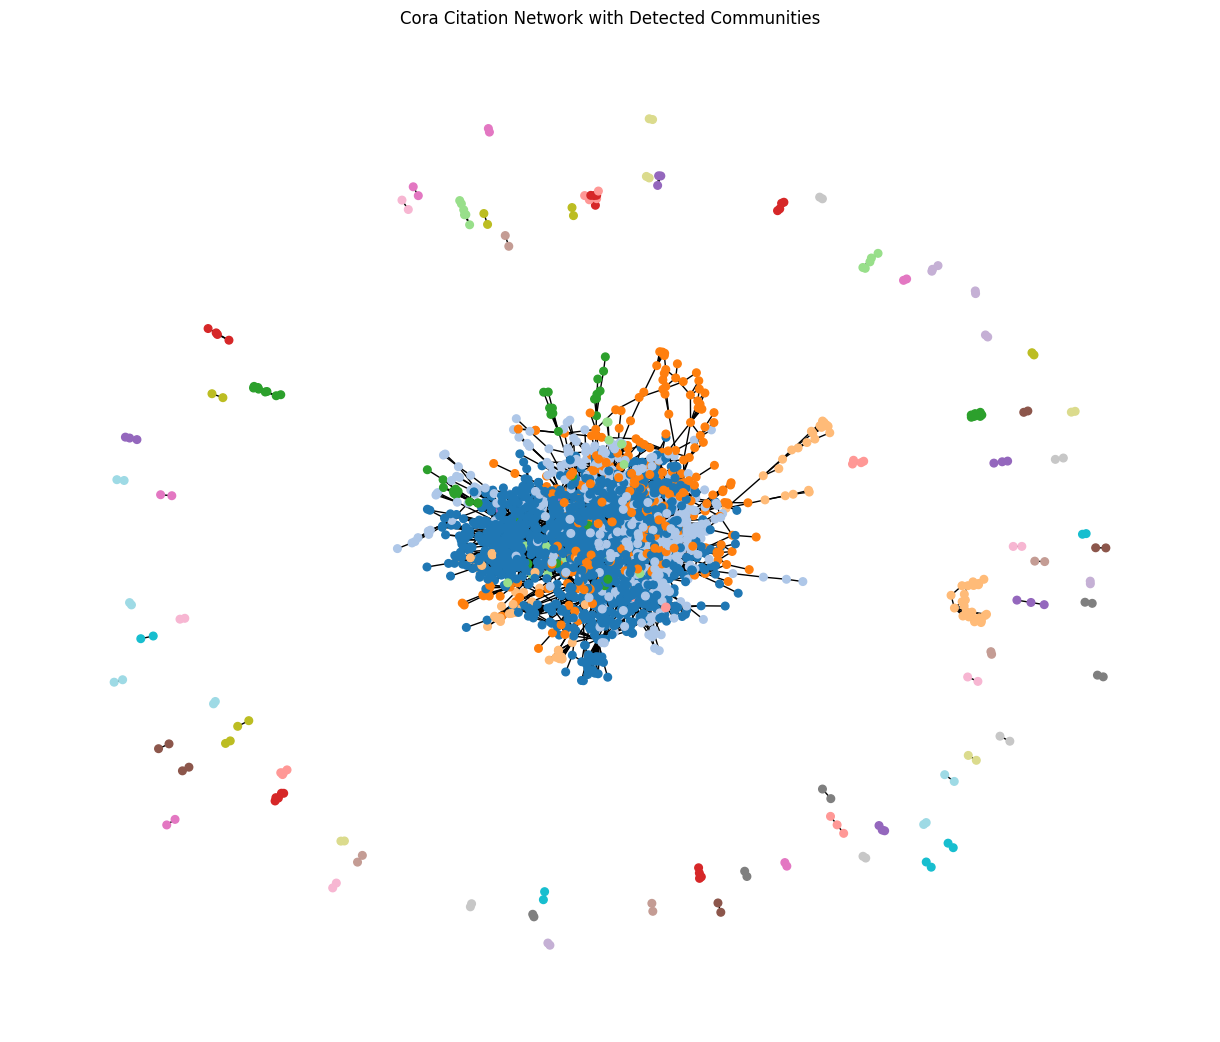

In [ ]:
# Import necessary libraries
import torch
from torch_geometric.datasets import Planetoid
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx
from networkx.algorithms import community

# Load the Cora dataset from PyTorch Geometric
dataset = Planetoid(root='/tmp/Cora', name='Cora')
data = dataset[0]  # Get the first (and only) graph object

# Convert the PyTorch Geometric data to a NetworkX graph for visualization and analysis
G = to_networkx(data, to_undirected=True)

# Basic exploration of the graph
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

# Visualizing with node colors based on their class labels
plt.figure(figsize=(12, 10))
nx.draw(G, node_size=30, node_color=data.y, cmap="viridis", with_labels=False)
plt.title("Cora Citation Network Visualization (Nodes colored by Class)")
plt.show()

# Advanced Graph Analysis

# 1. Degree Centrality - Finding important nodes
degree_centrality = nx.degree_centrality(G)
print("Top 5 Nodes by Degree Centrality:")
print(sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5])

# 2. Community Detection - Finding groups in the graph
communities = community.greedy_modularity_communities(G)
print("Number of communities detected:", len(communities))
print("Top 3 largest communities (by number of nodes):")
for i, com in enumerate(communities[:3]):
    print(f"Community {i+1}: {len(com)} nodes")

# 3. PageRank - Identifying influential nodes
pagerank = nx.pagerank(G)
print("Top 5 Nodes by PageRank:")
print(sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:5])

# 4. Visualizing Communities
# Create a color map for the communities
node_colors = {}
for i, com in enumerate(communities):
    for node in com:
        node_colors[node] = i

# Extract colors for each node
node_color_list = [node_colors.get(node, -1) for node in G.nodes()]

# Plot the network with community colors
plt.figure(figsize=(12, 10))
nx.draw(G, node_color=node_color_list, cmap="tab20", node_size=30, with_labels=False)
plt.title("Cora Citation Network with Detected Communities")
plt.show()

In [ ]:
pip install torch torch-geometric networkx matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 63.1 MB/s eta 0:00:00
